In [1]:
from PipelinesModels import *
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

c:\SandBox\FluShotLearning\PipelinesModels.py:205: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if set_ is "train":


In [2]:
df = pd.read_csv("training_set_features.csv", index_col="respondent_id")
mappings = uf.read_json("mapping.json")
results = pd.read_csv("training_set_labels.csv", index_col="respondent_id")

results = results[TARGETS[1]]

X_train, X_test, y_train, y_test = train_test_split(df, results, test_size=0.2, random_state=42)

In [4]:
test = pd.read_csv("test_set_features.csv", index_col="respondent_id")
results

respondent_id
0        0
1        1
2        0
3        1
4        0
        ..
26702    0
26703    0
26704    1
26705    0
26706    0
Name: seasonal_vaccine, Length: 26707, dtype: int64

# Decision Tree

In [18]:
dt_pipeline = DTPipeline()
pipeline_model = dt_pipeline.build_pipeline(X_train)

In [19]:
params = {
    'selectkbest__k': [5, 10, 15, 'all'],
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [4, 5, 6],
    'dt__min_samples_split': [2, 3, 4, 5],
    'dt__min_samples_leaf': [3, 4, 5]
}

In [20]:
grid_search = GridSearchCV(
    estimator=pipeline_model,
    param_grid=params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
)

grid_search.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'dt__criterion': ['gini', 'entropy'], 'dt__max_depth': [4, 5, ...], 'dt__min_samples_leaf': [3, 4, ...], 'dt__min_samples_split': [2, 3, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation ti

In [21]:
final_model = grid_search.best_estimator_

y_pred = final_model.predict(X_test)
print("\nClassification Report for Test set")
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1]))


Classification Report for Test set
              precision    recall  f1-score   support

           0       0.80      0.75      0.78      2891
           1       0.73      0.78      0.75      2451

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342

0.8380372209876006


# Random Forest

In [22]:
rf_pipeline = RFPipeline()
rf_pipeline_model = rf_pipeline.build_pipeline(X_train)

In [23]:
params = {
    'selectkbest__k': [10, 15, 20],
    'rf__n_estimators': [100, 200], # tree number
    'rf__max_depth': [5, 10, 15], # trees depth
    'rf__min_samples_leaf': [2, 4, 10],
    'rf__max_features': ['sqrt', 'log2'] # features number
}

In [24]:
grid_search = GridSearchCV(
    estimator=rf_pipeline_model,
    param_grid=params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
)

grid_search.fit(X_train, y_train)

c:\SandBox\Flue Shot\Flue-Shot-Machine-Learning\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'rf__max_depth': [5, 10, ...], 'rf__max_features': ['sqrt', 'log2'], 'rf__min_samples_leaf': [2, 4, ...], 'rf__n_estimators': [100, 200], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time fo

In [25]:
final_model = grid_search.best_estimator_

y_pred = final_model.predict(X_test)
print("\nClassification Report for Test set")
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1]))


Classification Report for Test set
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2891
           1       0.76      0.77      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342

0.8546381438702901


<Axes: >

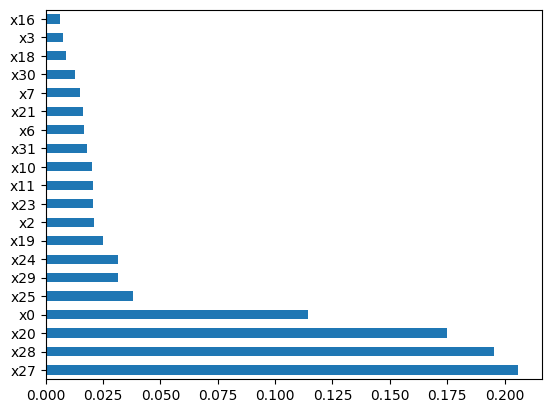

In [26]:
rf_model = grid_search.best_estimator_.named_steps['rf']
importances = rf_model.feature_importances_

features = grid_search.best_estimator_.named_steps['selectkbest'].get_feature_names_out()
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)
feat_importances.plot(kind='barh')